# Linear Regression Assignment

## Bike Sharing Assignment (BoomBikes)

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

Essentially, the company wants —

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.


## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

In [3]:
# Read the given CSV file

bike = pd.read_csv("day.csv")

In [4]:
# Looking at the first five rows

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Let's inspect the various aspects of our dataframe**

In [5]:
# Print the shape of dataframe bike

bike.shape

(730, 16)

In [6]:
# Print the information of variables to check their data types.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Describe all columns in bike dataframe 

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Cleaning

In [8]:
#Checking missing values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Insights 

- The above output shows that there are no missing values in the dataset.

**Drop Unnecessary Variables**

 1. instant - As we can see that this is the unique column of each row and of no use,so we can drop this column.
 2. dteday  - It represent date,month,year but as we have other separate column of each of this,so we can drop this column.
 3. casual & registered  - 'casual' and 'registered' is equal to 'cnt' so we can drop this two column and consider 'cnt' as our target varible.

In [9]:
#Dropping unnecessary variable since they dont have significance with data

bike.drop(['instant','dteday','casual','registered'],inplace=True,axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Rename the columns for better understanding**

- yr - year
- mnth - month
- hum - humidity
- cnt - count

In [10]:
#Renaming the columns

bike.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#Mapping variables season, month, weathersit, weekday

bike['season'] = bike.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })

bike['month'] = bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike['weathersit'] = bike.weathersit.map({1: 'Clear',2:'Mist_Cloudy',3:'Light Snow',4:'Snow + Fog'})

bike['weekday'] = bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Data Visualisation

 1. Let's now visualise our data using seaborn and matplotlib.
 2. First we find out continuous and categorical variables from the dataset.
 3. Then we will make a pairplot of all the numerical variables present to visualise which variables are most correlated to `count`.
 4. Also visualise the categorical variable.

In [12]:
# We'll visualise our data using matplotlib and seaborn. 
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
# Print the continuous and categorical variable

bike.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
windspeed     649
atemp         689
count         695
dtype: int64

Insights:

- Columns 'season', 'month','weekday','weathersit','month' are all `categorical variables`.
- Coulmns 'temp','humidity','windspeed','atemp','count' are all `numerical variables`.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

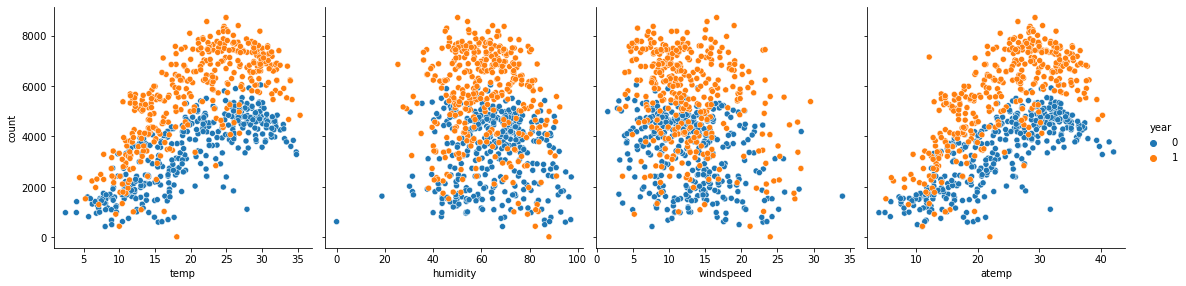

In [14]:
# Pairplot of all the numerical features against target and year feature

sns.pairplot(bike, x_vars=['temp', 'humidity', 'windspeed', 'atemp'], y_vars='count',hue='year',size=4, aspect=1, kind='scatter')
plt.show()

Insights:

- From the above plot we can see that `temp` and `atemp` highly correlated to the target variable.
- As we can see that all the parameters are increased in the year `2019` as compared to the 2018.
- Hence `year` and `temp` and `atemp` are the important feature in the model.

**Visualising Outliers**

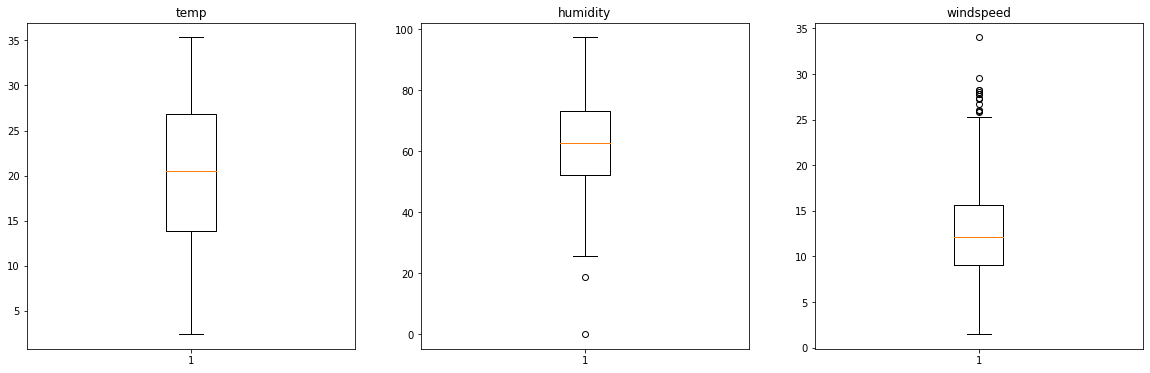

In [15]:
# check outliers in numerical variables using barplot

plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title('temp')
plt.boxplot(bike['temp'])

plt.subplot(1,3,2)
plt.title('humidity')
plt.boxplot(bike['humidity'])

plt.subplot(1,3,3)
plt.title('windspeed')
plt.boxplot(bike['windspeed'])

plt.show()

Insight:

 - As we can see there are some outliers in `humidity` and `windspeed`.

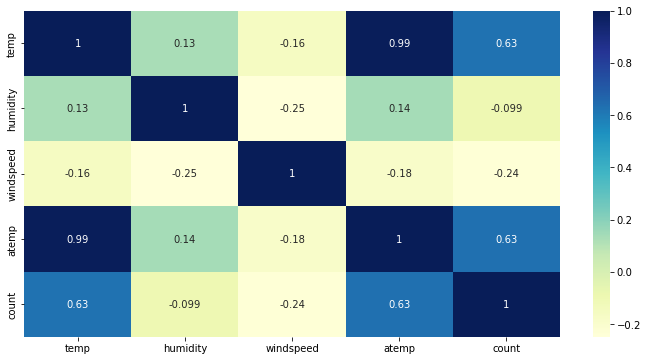

In [16]:
# Heatmap to see correlation between variables

plt.figure(figsize = (12,6))
sns.heatmap(bike[["temp","humidity","windspeed","atemp","count"]].corr(),cmap="YlGnBu",annot =True)
plt.show()

Insights:

- temp and atemp are positively correlated to the target featute `count`.But both parameters cannot be used in the model due to `multicolinearity`. Hence one can be dropped.
- humidity has not much negative effect on target variabl.
- windspeed has a high negative correlation with target variable.

In [17]:
# Drop feature atemp from the dataset

bike.drop(['atemp'],inplace=True,axis=1)
bike.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

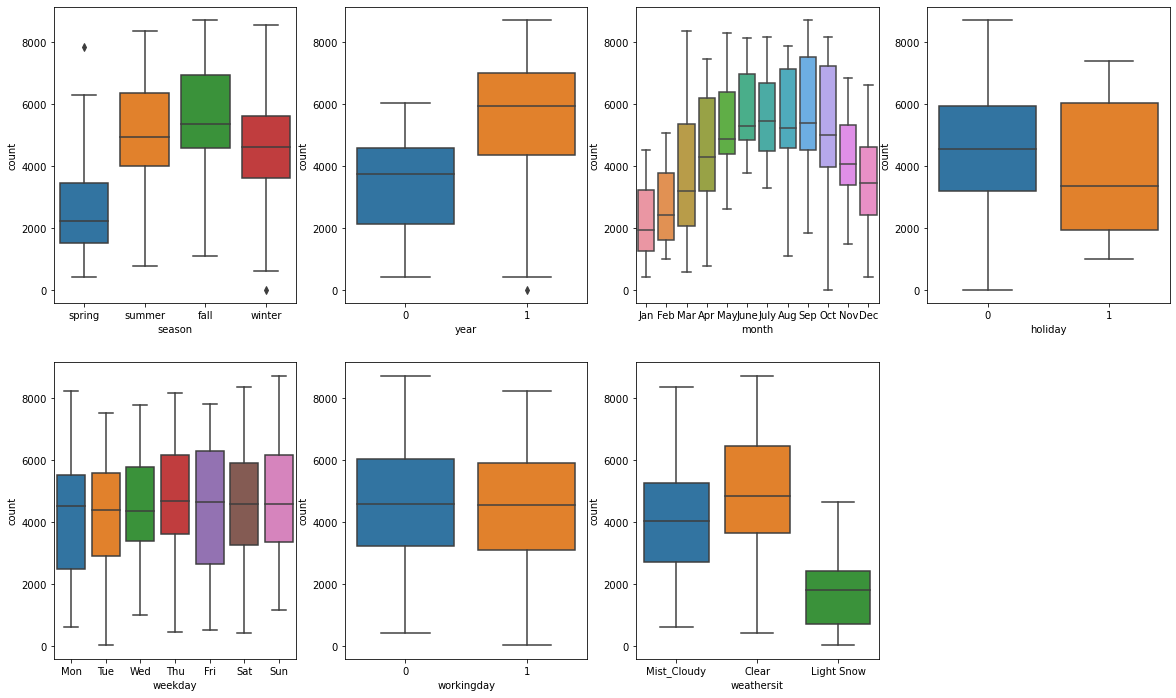

In [18]:
# Boxplot of categorical features

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)

sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,4,2)

sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(2,4,3) 

sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,4,4)

sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.subplot(2,4,5)

sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(2,4,6)

sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(2,4,7)


sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.show()


Insights:

- Bikes booking have more in fall season in the year 2019
- In the month of may,june,july,aug and sep observed very less booking.
- Also more in Clear weathersit.
- Thu,Fri,Sat,Sun shows more number of booking as compared to the start of the week.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `weekday` as the hue.

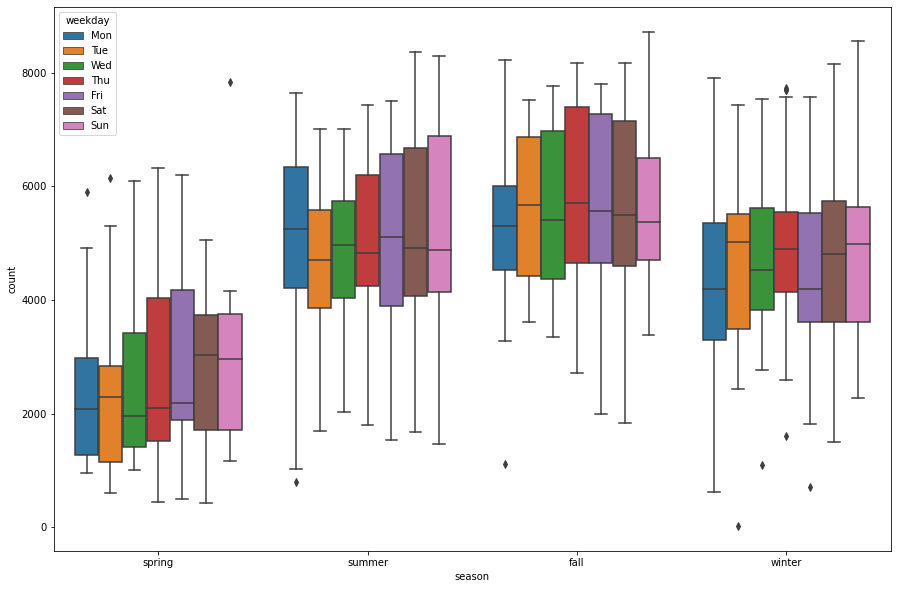

In [19]:
# Box plot for season,weekday to count

plt.figure(figsize = (15, 10))
sns.boxplot(x = 'season', y = 'count', hue = 'weekday', data = bike)
plt.show()

Insights:

- As compared to summer season bike rentals were more in the fall season.
- It is observed that on saturday ,wednesday and thursday bike rentals were more.

**Univariate Analysis**

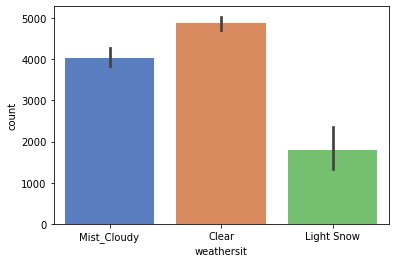

In [20]:
#Relation between weathersit and count of bike rentals

sns.barplot('weathersit','count',palette="muted",data=bike)
plt.show()
           

Insight:

- From the above plot it is observed in clear weather the bike renting demand is high.
- Mist_Cloudy days have less rentals as compared to the clear weather.
- Bike rentals are very less in light snow.

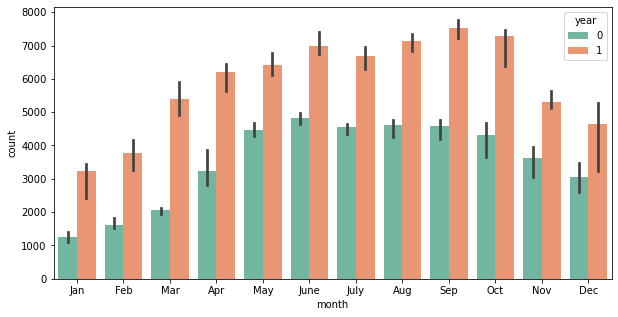

In [21]:
# Relation between month and year

from numpy import median
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='Set2',estimator=median)
plt.show()

Insights-

- 0 represents year 2018
- 1 represents year 2019
- Bike rentals are more in the year 2019 as comapred to 2018
- Most of the bike rents were happening in the month of September 2019.
- In the Jan month bike rentals were very less as compared to the other months.

**Working Day vs Holiday Distribution**

<AxesSubplot:xlabel='workingday', ylabel='count'>

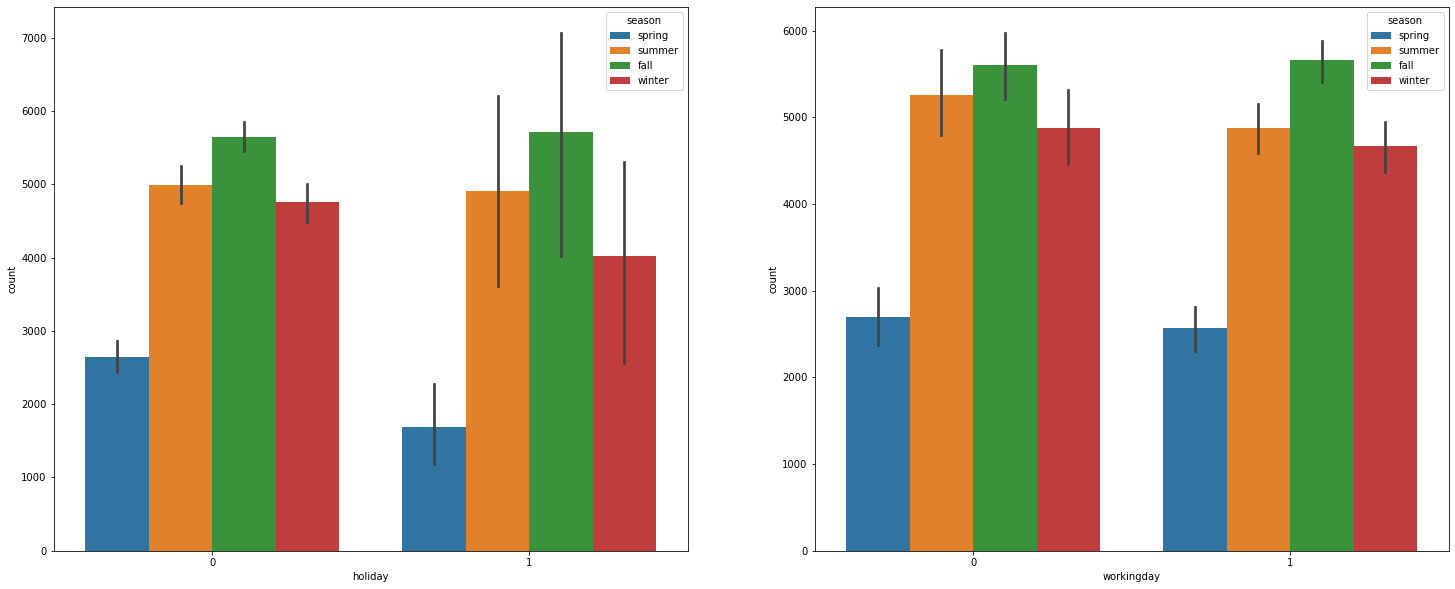

In [22]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(25,10))
sns.barplot(data=bike,x='holiday',y='count',hue="season",ax=ax1)
sns.barplot(data=bike,x='workingday',y='count',hue="season",ax=ax2)

Insights:

- Bike rentals are more during fall season and then in summer.
- Most rentals are during the working days as comapred to the holidays.
- Both the parameters shows that fall is the best season for bike rentals followed by the summer,winter.
- Spring has the lowest count in bike rentals.

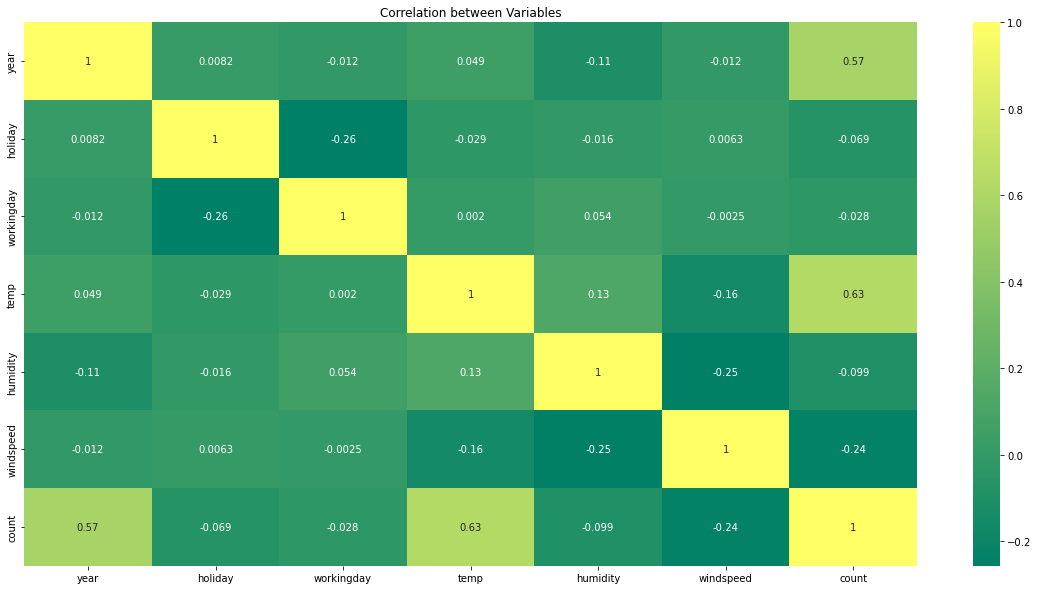

In [23]:
# Heatmap to see correlation between variables

plt.figure(figsize=(20,10))
sns.heatmap(bike.corr(), cmap='summer', annot = True)
plt.title("Correlation between Variables")
plt.show()

Insights:
    
- From the above heatmap,we get the clear idea of that some variables are multicollinear which are positively correlated with target variable 'count' to  temp and year.
- However, there are some attributes that show a negative relationship w.r.t count:holiday,workingday,humidity,windspeed.
- So we can build the model by using linear regression.

 

## Step 3 : Data Preparation

- Create dummy variables for all the categorical variable
- Divide the data to train and test
- Perform Scaling
- Divide the data into X and y

In [24]:
# check the data types of each variable

bike.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

In [25]:
# check the unique values in the index

bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

### Dummy Variables

The variable `season` has four levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [26]:
# create dummy variables for season 

season_1 = pd.get_dummies(bike['season'])
season_1

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


Now, we don't need four columns. We can drop the `spring` column, as the type of season can be identified with just the last three columns where — 

<br>

- 000 will corresponds to spring
- 100 will corresponds to summer
- 010 will corresponds to fall
- 001 will corresponds to winter

In [27]:
# Let's drop the first column from season_1  using 'drop_first = True'

season_1 = pd.get_dummies(bike['season'], drop_first = True)

Similarly we can create dummy variables of the column month,weekday and weathersit and drop first column

In [28]:
# create dummy variables for month
month_1 = pd.get_dummies(bike.month,drop_first=True)

# create dummy variables for weekday
weekday_1 = pd.get_dummies(bike.weekday,drop_first=True)

# create dummy variables for weather
weathersit_1 = pd.get_dummies(bike.weathersit,drop_first=True)

In [29]:
# Add the results to the original bike dataframe and see the head of dataframe

bike = pd.concat([bike,season_1,month_1,weekday_1,weathersit_1], axis = 1)

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist_Cloudy
0,spring,0,Jan,0,Mon,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Drop 'season','month','weekday','weathersit' 

bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

bike.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist_Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#Number of rows and columns

bike.shape

(730, 29)

## Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [32]:
# Import library

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7,random_state = 100)

In [33]:
#Rows and columns after split

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features 

Here we can see that all the columns have some integer values. So it is extremely important to rescale the variables so that they have a comparable scale.

We will use `MinMax scaling.`

In [34]:
# Import library

from sklearn.preprocessing import MinMaxScaler

In [35]:
# Instantiate an object

scaler = MinMaxScaler()

In [36]:
# Apply scaler() to all the numerical columns except 'dummy' variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
# Generate descriptive statistics.

df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insight:

- The above statistics shows that MinMax Scaling has been done properly for the training data.
- The minimum value is 0 for each feature.
- The Maximum value is 1 for each feature.

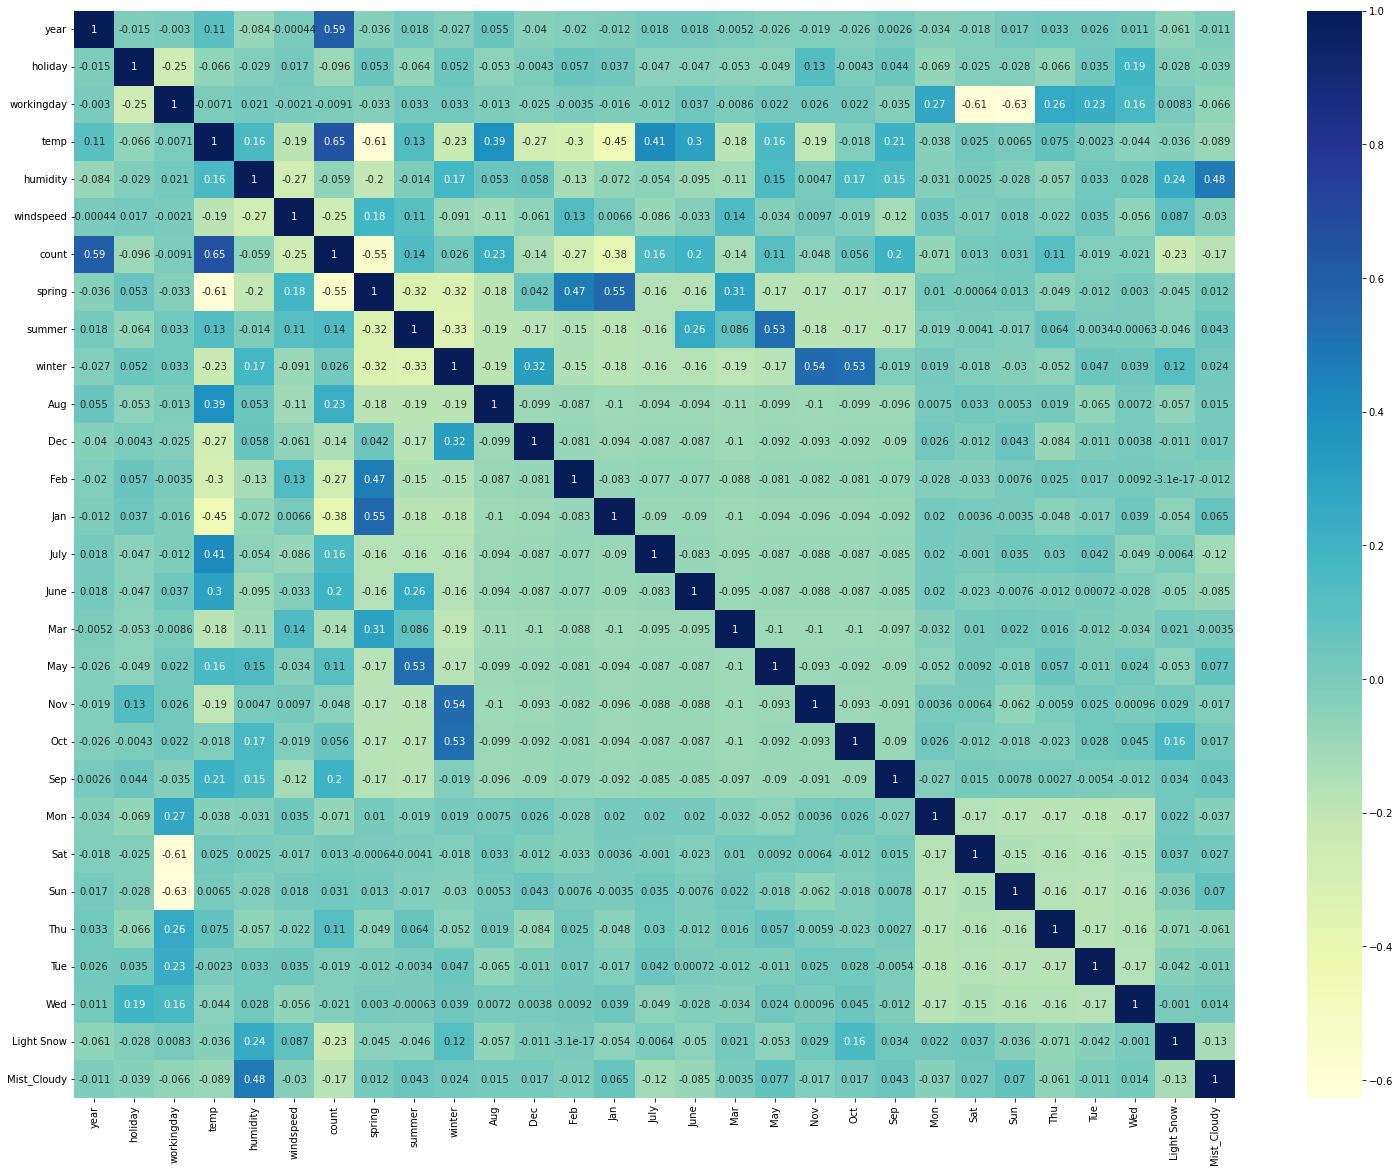

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Insights:

- The above heat map shows that variables temp ,year are highly correlated to the target variable 'count'.
- The counts are little bit high in the month of Aug and Sep.
- So let's go ahead and perform linear regression using `count` as our target variable.

### Dividing into X and Y sets for the model building

In [39]:
# Dividing into X and Y sets 

y_train = df_train.pop('count')
X_train = df_train



## Step 4 : Building our model
​
This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [40]:
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist_Cloudy', True, 1)]

In [43]:
# list of colums where rfe support true
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sep', 'Light Snow',
       'Mist_Cloudy'],
      dtype='object')

In [44]:
# List of columns where rfe support false
X_train.columns[~rfe.support_] 

Index(['workingday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()   

In [48]:
# Check the parameters
lm.params

const          0.319667
year           0.230404
holiday       -0.091089
temp           0.481503
humidity      -0.162213
windspeed     -0.188726
spring        -0.061255
summer         0.042337
winter         0.101921
Dec           -0.035461
Jan           -0.043411
July          -0.055250
Nov           -0.038701
Sep            0.075467
Light Snow    -0.246481
Mist_Cloudy   -0.054300
dtype: float64

In [49]:
#Let's see the summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          8.15e-189
Time:                        21:59:25   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [50]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [51]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist_Cloudy,2.32
0,year,2.09
11,Nov,1.85
9,Jan,1.75


Dec is insignificant in presence of other variables due to high p-value and low VIF; can be dropped

In [52]:
#Drop Dec variable

X_train_new_1 = X_train_rfe.drop(["Dec"], axis = 1)

Rebuilding the model without 'Dec'

In [53]:
#Build a model

X_train_lm_1 = sm.add_constant(X_train_new_1)
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.41e-189
Time:                        21:59:25   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3032      0.035      8.598      

In [54]:
#Drop the constant term 

X_train_lm_1 = X_train_lm_1.drop(['const'], axis=1)

In [55]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.09
2,temp,16.80
4,windspeed,4.72
5,spring,4.37
7,winter,3.78
6,summer,2.80
13,Mist_Cloudy,2.29
0,year,2.09
8,Jan,1.67
10,Nov,1.60


'humidity' variable can be dropped as its insignificant by looking at very high VIF


Rebuilding the model without 'humidity'

In [56]:
#Drop humidity variable 

X_train_new_2 = X_train_lm_1.drop(["humidity"], axis = 1)

In [57]:
#Build a model

X_train_lm_2 = sm.add_constant(X_train_new_2)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.93e-186
Time:                        21:59:25   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2208      0.031      7.190      

In [58]:
#Drop the constant

X_train_lm_2=X_train_lm_2.drop(['const'],axis=1)

In [59]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.15
3,windspeed,4.67
4,spring,2.76
6,winter,2.28
5,summer,2.24
0,year,2.07
7,Jan,1.61
9,Nov,1.60
8,July,1.59
12,Mist_Cloudy,1.56


Jan is insignificant in presence of other variables due to low p-value and high VIF; can be dropped

In [60]:
#Drop Jan

X_train_new_3 = X_train_lm_2.drop(["Jan"], axis = 1)

Rebuilding the model without 'Jan'

In [61]:
#Build a model

X_train_lm_3 = sm.add_constant(X_train_new_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.19e-186
Time:                        21:59:25   Log-Likelihood:                 499.44
No. Observations:                 510   AIC:                            -972.9
Df Residuals:                     497   BIC:                            -917.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2042      0.030      6.839      

In [62]:
#Drop constant 

X_train_lm_3=X_train_lm_3.drop(['const'],axis=1)

In [63]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,4.65
6,winter,2.28
5,summer,2.23
4,spring,2.09
0,year,2.07
8,Nov,1.60
7,July,1.58
11,Mist_Cloudy,1.55
9,Sep,1.35


Nov is insignificant in presence of other variables due to low p-value and high VIF; can be dropped

In [64]:
#Drop Nov variable

X_train_new_4 = X_train_lm_3.drop(["Nov"], axis = 1)

Rebuilding the model without 'Nov'

In [65]:
#Build a model

X_train_lm_4 = sm.add_constant(X_train_new_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.06e-187
Time:                        21:59:25   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.746      

In [66]:
#Drop constant 

X_train_lm_4=X_train_lm_4.drop(['const'],axis=1)

In [67]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,July,1.58
10,Mist_Cloudy,1.55
8,Sep,1.34
9,Light Snow,1.08


July seems to be insignificant,by looking at VIF and p-value also it has negative correlation with count. Lets drop it

Rebuilding the model without july

In [68]:
#Drop July

X_train_new_5= X_train_lm_4.drop(['July'], axis=1)


In [69]:
#Build a model

X_train_lm_5 =sm.add_constant(X_train_new_5)
lm_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.47e-186
Time:                        21:59:25   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1909      0.030      6.447      

In [70]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new_5
#Drop the constant
X = X_train_lm_5.drop(['const'],axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Mist_Cloudy,1.55
7,Sep,1.23
8,Light Snow,1.08
1,holiday,1.04


Insights:

- The VIFs of all feature variables is less than 5, so there is no multicollinearity.
- As we can see P-value seems to be significant.
- The F-statistics is 248.4 which is greater than 1.
- Hence overall we have a decent model.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
# check error terms

X_train_lm_5

,const,year,holiday,temp,windspeed,spring,summer,winter,Sep,Light Snow,Mist_Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [72]:
#y train predicted

y_train_pred = lm_5.predict(X_train_lm_5)

In [73]:
# Importing the required libraries for plots.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

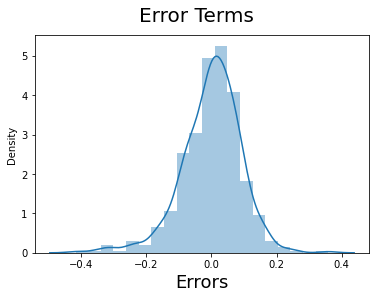

In [74]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**We can see Error terms are normally distributed**

#### Looking for patterns in the residuals

Text(0, 0.5, 'Residual')

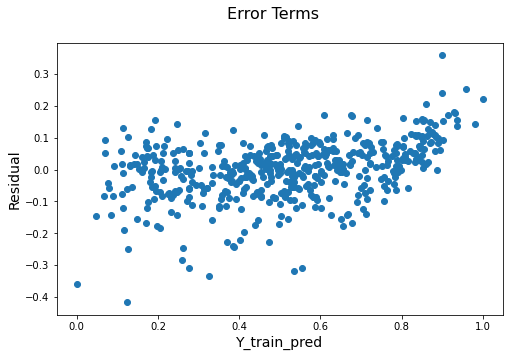

In [75]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,y_train - y_train_pred)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)  

Insights:

- The plot shows that Y_train_pred with respect to Residual is random.
- Error terms have constant variance `(homoscedasticity)`.

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

#### Applying the scaling on the test sets

In [76]:
# Create a list of numeric variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
# Check dataframe

df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [78]:
# Print statistics of dataframe

df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
#Dividing into X_test and y_test

y_test = df_test.pop('count')
X_test = df_test


In [80]:
#Columns

X_train_new_5.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Sep', 'Light Snow', 'Mist_Cloudy'],
      dtype='object')

In [81]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new_5.columns]

# Adding a constant variable 

X_test_new_1 = sm.add_constant(X_test_new)
X_test_new_1.head()

,const,year,holiday,temp,windspeed,spring,summer,winter,Sep,Light Snow,Mist_Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [82]:
# Making predictions using fifth model

y_pred = lm_5.predict(X_test_new_1)

**Finding R-squared and Adjusted R-Squared for Test set**

In [83]:
#Evaluate R-square for test

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8038195990728845

##### Looking at the RMSE

In [84]:
# Calculating the Mean Squared Error of test dataset

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))


0.0968515592224285

**We have Mean Squared Error close to 0  which means our model is able to perform on unknown data set too.**

In [85]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.80381)*(11-1)/(11-1-1)
print(Adj_r2)

0.7820111111111111


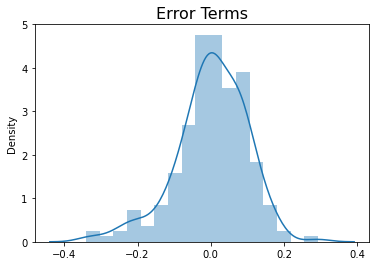

In [86]:
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

The distribution plot of error term shows the normal distribution with mean at Zero.


Text(0, 0.5, 'Residual')

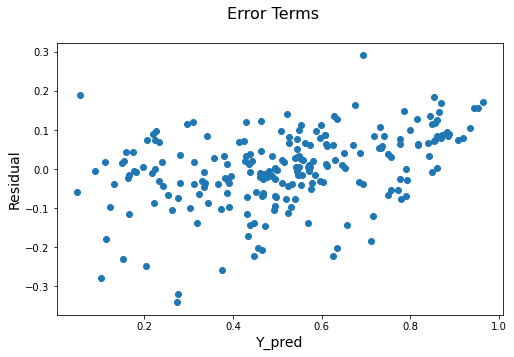

In [87]:
#Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

Insights:

- Above plot shows that y_pred corresponding to Residual is randomly distributed.

### Results:

**Train and Test Model**

- Train R^2 : 0.833
- Train Adjusted R^2 : 0.829
- Test R^2: 0.803
- Test Adjusted R^2: 0.782
- Difference in R^2 between train and test: 3%
- Difference in adjusted R^2 between Train and test: 4.7% which is less than 5%

## Step 5: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Visualising the fit on the test set

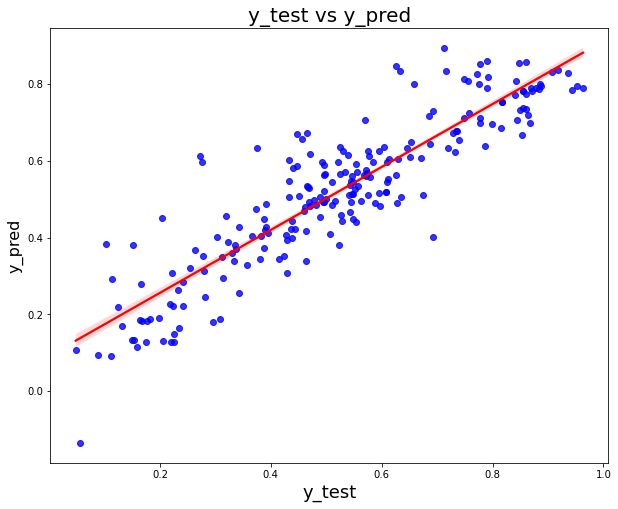

In [88]:
#Regression plot
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Plot heading
plt.title('y_test vs y_pred', fontsize=20)

# X-label
plt.xlabel('y_test', fontsize=18)

# Y-label
plt.ylabel('y_pred', fontsize=16)                          
plt.show()    

Insights:

- The model fit isn't by chance, and has decent predictive power.
- As we can see, the regression line is a pretty good fit to the data.

**We can see that the equation of our best fitted line is**

$ count = 0.2341  \times  year + 0.4777  \times  temp + 0.0621 \times summer + 0.0945 \times winter + 0.0910 \times Sep -0.0963 \times holiday - 0.1481 \times windspeed - 0.0554 \times spring - 0.02850 \times Light Snow - 0.0787 \times Mist + Cloudy $


**Summary**

<br>


- From the final model it can be seen that the variables are `year`,`temp`,`season` are most significant in predicting the demand for shared bikes.


- The temperature shows highest coefficient of 0.4777 indicate that if the `temp` increses by one unit the total number of bike rentals increases by 0.4777 units.


- Similarly the coefficient value of ‘0.2341’ indicated that a unit increase in `year` variable increases the bike hire numbers by 0.2341 units.


- `winter` season is playing crusial role in the demand of shared bikes.


- We can see that some variables have negative coefficients which indicates that as the independent variable increses,the dependent variable tends to decreses.


- A coefficient value of ‘−0.1481’ indicated that, a unit increase in `windspeed` variable decreases the bike hire numbers by −0.1481 units.


- We see highest number bike rentals in Fall and Summer Seasons and the lowest in Spring season.

**Analysis of the Model**

By analysing the model,the BoomBike Comapny should focus on the followning features:

**Year** : The company should focus an increase in the number of users when the situation gets normal as compared to the year 2019.

**Season** : The company should focus on more in summer and fall season.

**weather** : The users prefer to rent a bike when the weather is clear and cloudy.

**temp** : The user prefer to rent a bike in a moderate temperature.